<a href="https://colab.research.google.com/github/Ingenjoy/Recommendation/blob/master/Day3/DAY03_01_SVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
ratings = [
            [1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,0,0,4,4],
            [0,0,0,5,5],
            [0,0,0,2,2]]
df = pd.DataFrame(ratings, 
                    columns = ['스타워즈','아바타','혹성탈출','사랑과영혼','타이타닉'],
                   index=['User01','User02','User03','User04','User05','User06','User07']
                  )


In [0]:
print (df)

        스타워즈  아바타  혹성탈출  사랑과영혼  타이타닉
User01     1    1     1      0     0
User02     3    3     3      0     0
User03     4    4     4      0     0
User04     5    5     5      0     0
User05     0    0     0      4     4
User06     0    0     0      5     5
User07     0    0     0      2     2


In [0]:
u, s, v = np.linalg.svd(df, full_matrices=False)

In [0]:
print("u : "+str(u.shape))
print("s : "+str(s.shape))
print("v : "+str(v.shape))

u : (7, 5)
s : (5,)
v : (5, 5)


In [0]:
print(s)

[12.36931688  9.48683298  0.          0.          0.        ]


In [0]:
u

array([[-0.14002801,  0.        ,  0.41748286, -0.56011203, -0.42008403],
       [-0.42008403,  0.        ,  0.15383647, -0.20639328,  0.84520504],
       [-0.56011203,  0.        ,  0.20511529,  0.72480896, -0.20639328],
       [-0.70014004,  0.        , -0.33989068, -0.3439888 , -0.2579916 ],
       [ 0.        , -0.59628479,  0.64444444,  0.        ,  0.        ],
       [ 0.        , -0.74535599, -0.44444444,  0.        ,  0.        ],
       [ 0.        , -0.2981424 , -0.17777778,  0.        ,  0.        ]])

In [0]:
print (pd.DataFrame(u))

          0         1         2         3         4
0 -0.140028  0.000000  0.417483 -0.560112 -0.420084
1 -0.420084  0.000000  0.153836 -0.206393  0.845205
2 -0.560112  0.000000  0.205115  0.724809 -0.206393
3 -0.700140  0.000000 -0.339891 -0.343989 -0.257992
4  0.000000 -0.596285  0.644444  0.000000  0.000000
5  0.000000 -0.745356 -0.444444  0.000000  0.000000
6  0.000000 -0.298142 -0.177778  0.000000  0.000000


In [0]:
# s는 내림차순으로 정렬됨
print(pd.DataFrame(s))

           0
0  12.369317
1   9.486833
2   0.000000
3   0.000000
4   0.000000


In [0]:
print(pd.DataFrame(v))

          0         1         2         3         4
0 -0.577350 -0.577350 -0.577350 -0.000000 -0.000000
1 -0.000000 -0.000000 -0.000000 -0.707107 -0.707107
2  0.000000  0.000000  0.000000 -0.707107  0.707107
3  0.000000 -0.707107  0.707107  0.000000  0.000000
4  0.816497 -0.408248 -0.408248  0.000000  0.000000


In [0]:
print(pd.DataFrame(np.diag(s)))

           0         1    2    3    4
0  12.369317  0.000000  0.0  0.0  0.0
1   0.000000  9.486833  0.0  0.0  0.0
2   0.000000  0.000000  0.0  0.0  0.0
3   0.000000  0.000000  0.0  0.0  0.0
4   0.000000  0.000000  0.0  0.0  0.0


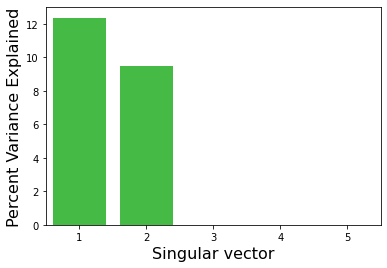

In [0]:
sns.barplot(x=list(range(1,len(s)+1)),
            y=s, color="limegreen")
plt.xlabel('Singular vector', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

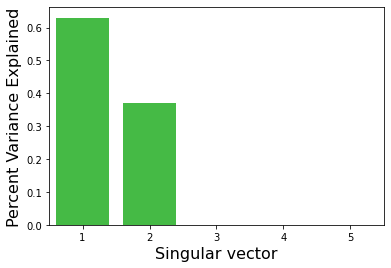

In [0]:
var_explained = np.round(s**2/np.sum(s**2), decimals=3)
var_explained
 
sns.barplot(x=list(range(1,len(var_explained)+1)),
            y=var_explained, color="limegreen")
plt.xlabel('Singular vector', fontsize=16)
plt.ylabel('Percent Variance Explained', fontsize=16)
plt.savefig('svd_scree_plot.png',dpi=100)

In [0]:
u1 = u[:,:2]
u1

array([[-0.14002801,  0.        ],
       [-0.42008403,  0.        ],
       [-0.56011203,  0.        ],
       [-0.70014004,  0.        ],
       [ 0.        , -0.59628479],
       [ 0.        , -0.74535599],
       [ 0.        , -0.2981424 ]])

In [0]:
v1 = v[:2,:]
v1

array([[-0.57735027, -0.57735027, -0.57735027, -0.        , -0.        ],
       [-0.        , -0.        , -0.        , -0.70710678, -0.70710678]])

In [0]:
print(pd.DataFrame(np.diag(s)))

           0         1    2    3    4
0  12.369317  0.000000  0.0  0.0  0.0
1   0.000000  9.486833  0.0  0.0  0.0
2   0.000000  0.000000  0.0  0.0  0.0
3   0.000000  0.000000  0.0  0.0  0.0
4   0.000000  0.000000  0.0  0.0  0.0


In [0]:
s1 = s[0:2]
print(pd.DataFrame(np.diag(s1[0:2])))

           0         1
0  12.369317  0.000000
1   0.000000  9.486833


In [0]:
df

,스타워즈,아바타,혹성탈출,사랑과영혼,타이타닉
User01,1,1,1,0,0
User02,3,3,3,0,0
User03,4,4,4,0,0
User04,5,5,5,0,0
User05,0,0,0,4,4
User06,0,0,0,5,5
User07,0,0,0,2,2


In [0]:
np.matmul(np.matmul(u1, np.diag(s1)),v1)

array([[1., 1., 1., 0., 0.],
       [3., 3., 3., 0., 0.],
       [4., 4., 4., 0., 0.],
       [5., 5., 5., 0., 0.],
       [0., 0., 0., 4., 4.],
       [0., 0., 0., 5., 5.],
       [0., 0., 0., 2., 2.]])

reference
https://cmdlinetips.com/2019/05/singular-value-decomposition-svd-in-python/

In [0]:
print("u : "+str(u.shape))
print("s : "+str(s.shape))
print("v : "+str(v.shape))

u : (7, 5)
s : (5,)
v : (5, 5)


In [0]:
print("u : "+str(u1.shape))
print("s : "+str(s1.shape))
print("v : "+str(v1.shape))

u : (7, 2)
s : (2,)
v : (5, 2)


SVD로 추천 시스템 구현하기

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
ratings = [
            [1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,0,0,4,4],
            [0,0,0,5,5],
            [0,0,0,2,2]]
df = pd.DataFrame(ratings, 
                    columns = ['스타워즈','아바타','혹성탈출','사랑과영혼','타이타닉'],
                   index=['User01','User02','User03','User04','User05','User06','User07']
                  )


In [0]:
df

,스타워즈,아바타,혹성탈출,사랑과영혼,타이타닉
User01,1,1,1,0,0
User02,3,3,3,0,0
User03,4,4,4,0,0
User04,5,5,5,0,0
User05,0,0,0,4,4
User06,0,0,0,5,5
User07,0,0,0,2,2


In [0]:
df.T.corr(method='pearson')

,User01,User02,User03,User04,User05,User06,User07
User01,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
User02,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
User03,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
User04,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
User05,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
User06,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
User07,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0


In [0]:
pd.DataFrame(np.matmul(np.matmul(u1, np.diag(s1)),v1)).T.corr(method='pearson')

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
3,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
5,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
6,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0


In [0]:
df.corr(method='pearson')

,스타워즈,아바타,혹성탈출,사랑과영혼,타이타닉
스타워즈,1.000000,1.000000,1.000000,-0.748783,-0.748783
아바타,1.000000,1.000000,1.000000,-0.748783,-0.748783
혹성탈출,1.000000,1.000000,1.000000,-0.748783,-0.748783
사랑과영혼,-0.748783,-0.748783,-0.748783,1.000000,1.000000
타이타닉,-0.748783,-0.748783,-0.748783,1.000000,1.000000


In [0]:
# SVD를 수행한 결과 데이터를 이용한 아이템 간 유사도
pd.DataFrame(np.matmul(np.matmul(u1, np.diag(s1)),v1)).corr(method='pearson')

,0,1,2,3,4
0,1.000000,1.000000,1.000000,-0.748783,-0.748783
1,1.000000,1.000000,1.000000,-0.748783,-0.748783
2,1.000000,1.000000,1.000000,-0.748783,-0.748783
3,-0.748783,-0.748783,-0.748783,1.000000,1.000000
4,-0.748783,-0.748783,-0.748783,1.000000,1.000000


차원 축소 후 사용자 간 유사도 계산


In [0]:
# 사용자 행렬 x 대각 행렬
pd.DataFrame(np.matmul(u1, np.diag(s1)))

,0,1
0,-1.732051,0.000000
1,-5.196152,0.000000
2,-6.928203,0.000000
3,-8.660254,0.000000
4,0.000000,-5.656854
5,0.000000,-7.071068
6,0.000000,-2.828427


In [0]:
pd.DataFrame(np.matmul(u1, np.diag(s1))).T.corr(method='pearson')

,0,1,2,3,4,5,6
0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
1,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
2,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
3,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
5,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
6,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0


In [0]:
# 대각 행렬 x 아이템 행렬
pd.DataFrame(np.matmul(np.diag(s1),v1))

,0,1,2,3,4
0,-7.141428,-7.141428,-7.141428,0.000000,0.000000
1,0.000000,0.000000,0.000000,-6.708204,-6.708204


In [0]:
# 대각 행렬 x 아이템 행렬을 이용한 유사도
pd.DataFrame(np.matmul(np.diag(s1),v1)).corr(method='pearson')

,0,1,2,3,4
0,1.0,1.0,1.0,-1.0,-1.0
1,1.0,1.0,1.0,-1.0,-1.0
2,1.0,1.0,1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,1.0,1.0
4,-1.0,-1.0,-1.0,1.0,1.0


이용자가 다양한 장르의 영화를 본다면


In [0]:
ratings2 = [
            [1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,0,0,4,4],
            [0,0,0,5,5],
            [0,1,0,2,2]]
df2 = pd.DataFrame(ratings2, 
                    columns = ['스타워즈','아바타','혹성탈출','사랑과영혼','타이타닉'],
                   index=['User01','User02','User03','User04','User05','User06','User07']
                  )


In [0]:
df2

,스타워즈,아바타,혹성탈출,사랑과영혼,타이타닉
User01,1,1,1,0,0
User02,3,3,3,0,0
User03,4,4,4,0,0
User04,5,5,5,0,0
User05,0,0,0,4,4
User06,0,0,0,5,5
User07,0,1,0,2,2


In [0]:
pd.DataFrame(u)

,0,1,2,3,4
0,-0.140028,0.000000,0.417483,-0.560112,-0.420084
1,-0.420084,0.000000,0.153836,-0.206393,0.845205
2,-0.560112,0.000000,0.205115,0.724809,-0.206393
3,-0.700140,0.000000,-0.339891,-0.343989,-0.257992
4,0.000000,-0.596285,0.644444,0.000000,0.000000
5,0.000000,-0.745356,-0.444444,0.000000,0.000000
6,0.000000,-0.298142,-0.177778,0.000000,0.000000


In [0]:
s

array([12.36931688,  9.48683298,  0.        ,  0.        ,  0.        ])

In [0]:
pd.DataFrame(v)

,0,1,2,3,4
0,-0.577350,-0.577350,-0.577350,-0.000000,-0.000000
1,-0.000000,-0.000000,-0.000000,-0.707107,-0.707107
2,0.000000,0.000000,0.000000,-0.707107,0.707107
3,0.000000,-0.707107,0.707107,0.000000,0.000000
4,0.816497,-0.408248,-0.408248,0.000000,0.000000


In [0]:
uu, ss, vv = np.linalg.svd(df2, full_matrices=False)

In [0]:
pd.DataFrame(uu)

,0,1,2,3,4
0,-0.139808,-0.004740,-0.006253,1.624366e-01,-0.536041
1,-0.419424,-0.014220,-0.018759,5.985558e-02,-0.197523
2,-0.559232,-0.018960,-0.025012,-2.102000e-01,0.693660
3,-0.699040,-0.023701,-0.031266,9.975929e-02,-0.329206
4,-0.011823,0.595831,-0.187323,7.473105e-01,0.226458
5,-0.014779,0.744788,-0.234153,-5.978484e-01,-0.181166
6,-0.052743,0.298546,0.952937,8.700336e-16,0.000000


In [0]:
ss

array([1.23845572e+01, 9.48772599e+00, 7.78331122e-01, 4.10137766e-16,
       3.66219481e-32])

In [0]:
pd.DataFrame(vv)

,0,1,2,3,4
0,-0.575734,-5.799925e-01,-5.757337e-01,-1.830286e-02,-1.830286e-02
1,-0.025480,5.986783e-03,-2.547981e-02,7.066349e-01,7.066349e-01
2,-0.409733,8.145998e-01,-4.097334e-01,-1.822489e-02,-1.822489e-02
3,-0.707107,5.551115e-16,7.071068e-01,5.551115e-17,5.551115e-17
4,0.000000,4.877240e-17,-4.877240e-17,-7.071068e-01,7.071068e-01


In [0]:
print(pd.DataFrame(np.diag(s)))

           0         1    2    3    4
0  12.369317  0.000000  0.0  0.0  0.0
1   0.000000  9.486833  0.0  0.0  0.0
2   0.000000  0.000000  0.0  0.0  0.0
3   0.000000  0.000000  0.0  0.0  0.0
4   0.000000  0.000000  0.0  0.0  0.0


In [0]:
print(pd.DataFrame(np.diag(ss)))

           0         1         2             3             4
0  12.384557  0.000000  0.000000  0.000000e+00  0.000000e+00
1   0.000000  9.487726  0.000000  0.000000e+00  0.000000e+00
2   0.000000  0.000000  0.778331  0.000000e+00  0.000000e+00
3   0.000000  0.000000  0.000000  4.101378e-16  0.000000e+00
4   0.000000  0.000000  0.000000  0.000000e+00  3.662195e-32


새로운 이용자가 추가 된다면?


In [0]:
ratings3 = [
            [1,1,1,0,0],
            [3,3,3,0,0],
            [4,4,4,0,0],
            [5,5,5,0,0],
            [0,0,0,4,4],
            [0,0,0,5,5],
            [0,1,0,2,2],
            [4,3,3,3,2]]
df3 = pd.DataFrame(ratings3, 
                    columns = ['스타워즈','아바타','혹성탈출','사랑과영혼','타이타닉'],
                   index=['User01','User02','User03','User04','User05','User06','User07','User08']
                  )


In [0]:
df3

,스타워즈,아바타,혹성탈출,사랑과영혼,타이타닉
User01,1,1,1,0,0
User02,3,3,3,0,0
User03,4,4,4,0,0
User04,5,5,5,0,0
User05,0,0,0,4,4
User06,0,0,0,5,5
User07,0,1,0,2,2
User08,4,3,3,3,2


In [0]:
uuu, sss, vvv = np.linalg.svd(df3, full_matrices=False)

In [0]:
pd.DataFrame(uuu)

,0,1,2,3,4
0,-0.121186,0.042185,-0.043852,-0.034919,-9.651042e-01
1,-0.363557,0.126555,-0.131555,-0.104757,2.248264e-01
2,-0.484743,0.168740,-0.175406,-0.139676,2.127101e-02
3,-0.605929,0.210925,-0.219258,-0.174595,4.110819e-02
4,-0.097648,-0.556997,-0.060082,-0.258561,9.841629e-02
5,-0.122060,-0.696246,-0.075102,-0.323201,-7.873303e-02
6,-0.088716,-0.265542,-0.604287,0.745958,2.220446e-16
7,-0.467665,-0.209107,0.726303,0.458309,-1.665335e-16


In [0]:
print(pd.DataFrame(np.diag(sss)))

           0         1         2         3             4
0  13.868052  0.000000  0.000000  0.000000  0.000000e+00
1   0.000000  9.855769  0.000000  0.000000  0.000000e+00
2   0.000000  0.000000  1.073534  0.000000  0.000000e+00
3   0.000000  0.000000  0.000000  0.623283  0.000000e+00
4   0.000000  0.000000  0.000000  0.000000  6.919055e-16


In [0]:
pd.DataFrame(vvv)

,0,1,2,3,4
0,-0.580553,-5.532272e-01,-0.546830,-0.186134,-0.152412
1,0.133425,1.276987e-01,0.154641,-0.696812,-0.675596
2,0.622975,-6.164733e-01,-0.053578,0.330214,-0.346339
3,0.084015,5.455212e-01,-0.651300,0.347513,-0.387802
4,0.500000,-2.775558e-16,-0.500000,-0.500000,0.500000


In [0]:
# 모든 대각 행렬 사용 시
pd.DataFrame(np.matmul(np.matmul(uuu, np.diag(sss)),vvv)).round(1)

,0,1,2,3,4
0,1.0,1.0,1.0,-0.0,-0.0
1,3.0,3.0,3.0,-0.0,-0.0
2,4.0,4.0,4.0,-0.0,-0.0
3,5.0,5.0,5.0,-0.0,-0.0
4,-0.0,-0.0,-0.0,4.0,4.0
5,-0.0,-0.0,-0.0,5.0,5.0
6,-0.0,1.0,0.0,2.0,2.0
7,4.0,3.0,3.0,3.0,2.0


In [0]:
# 모든 대각 행렬 사용 시
pd.DataFrame(np.matmul(np.matmul(uuu[:,:2], 
np.diag(sss[0:2])),vvv[:2,:])).round(1)

,0,1,2,3,4
0,1.0,1.0,1.0,0.0,-0.0
1,3.1,2.9,2.9,0.1,-0.1
2,4.1,3.9,3.9,0.1,-0.1
3,5.2,4.9,4.9,0.1,-0.1
4,0.1,0.0,-0.1,4.1,3.9
5,0.1,0.1,-0.1,5.1,4.9
6,0.4,0.3,0.3,2.1,2.0
7,3.5,3.3,3.2,2.6,2.4
